In [27]:
import os
import json
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import math
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
num_words=1300

In [3]:
file_list = os.listdir('data')
file_list

['Amazon_Q3_2018_Earning_Call_Transcript_Sentiment_Manual.json',
 'FB_earnings_call_transcript.json',
 'google_call_earnings.json',
 'microsoft.json',
 'NETFLIX_Q3_2018_EARNINGS_CALL_TRANSCRIPT_FANG.json']

In [4]:
text=[]
sentiment=[]

In [5]:
for file in file_list:
    with open('data/'+file,'r') as f:
        d = json.load(f)
        text.extend(d['text'].values())
        sentiment.extend(d['sentiment'].values())

In [6]:
X=text
Y=sentiment

In [7]:
print(len(X)==len(Y))
print(len(X))

True
622


In [8]:
tokenizer = Tokenizer(num_words=num_words)

In [9]:
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)


X = tokenizer.texts_to_matrix(X)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 3710 unique tokens.


In [10]:
len(X[1])

1300

In [11]:
Y

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 '

In [12]:
(x_train,x_test,y_train,y_test)=train_test_split(X,Y,random_state=42)


In [13]:
print(len(x_train)==len(y_train))
print(len(x_train))

True
466


In [14]:
X.shape

(622, 1300)

In [15]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\wenqi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wenqi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_pred = lr.predict(x_test)

In [17]:
print("Score for train: "+str(lr.score(x_train,y_train)))
print("Score: "+str(lr.score(x_test,y_test)))

Score for train: 0.9957081545064378
Score: 0.6666666666666666


In [18]:
bg=GaussianNB()
bg.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
y_pred = bg.predict(x_test)
print("Score for train: "+str(bg.score(x_train,y_train)))
print("Score: "+str(bg.score(x_test,y_test)))

Score for train: 0.944206008583691
Score: 0.6282051282051282


In [20]:
ber=BernoulliNB()
ber.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [21]:
y_pred = ber.predict(x_test)
print("Score for train: "+str(ber.score(x_train,y_train)))
print("Score: "+str(ber.score(x_test,y_test)))

Score for train: 0.851931330472103
Score: 0.7051282051282052


In [22]:
confusion_matrix(y_train,ber.predict(x_train),labels=['positive', 'neutral','negative'])

array([[204,  25,   2],
       [ 17, 166,   1],
       [  9,  15,  27]], dtype=int64)

In [23]:
confusion_matrix(y_test,y_pred,labels=['positive', 'neutral','negative'])

array([[70, 14,  2],
       [21, 37,  1],
       [ 1,  7,  3]], dtype=int64)

Accuracy Score:  0.7051282051282052
Predicted  negative  neutral  positive  __all__
Actual                                         
negative          3        7         1       11
neutral           1       37        21       59
positive          2       14        70       86
__all__           6       58        92      156


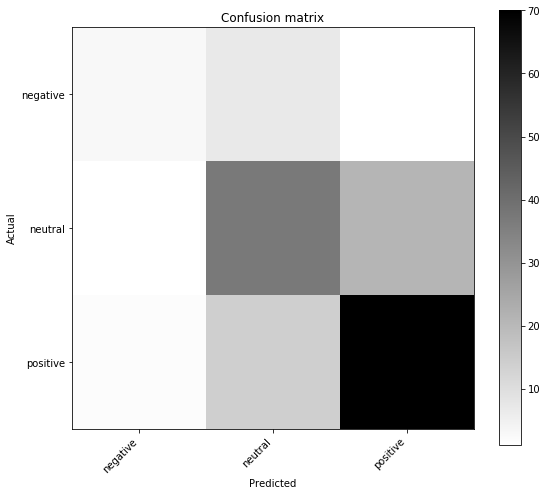

In [28]:
cnf_matrix = ConfusionMatrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)


print('Accuracy Score: ', acc_score)

print(cnf_matrix)

cnf_matrix.plot()
plt.show()